In [1]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from utils.utils import add_noise
import warnings
warnings.filterwarnings("ignore")

# Adding Additional Points

### Before adding additional points

In [2]:
data1 = pd.read_csv('data/raw/Analyte1.csv')
data1['label'] = 1
print(len(data1))

data2 = pd.read_csv('data/raw/Analyte2.csv')
data2['label'] = 2
print(len(data2))

data3 = pd.read_csv('data/raw/Analyte3.csv')
data3['label'] = 3
print(len(data3))

data = pd.concat([data1, data2, data3], axis=0)
data = data.drop(columns=['log']).reset_index(drop=True)
print(len(data))

# Applying PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(data[['Sensor1','Sensor2','Sensor3']])
pca_data = pd.DataFrame(pca_data, columns=['PC1','PC2'])

pca_data['Label'] = data['label']
pca_data.head(3)

25
25
25
75


,CFU/mL,Sensor2,Sensor1,Sensor3,label
0,30500000.0,70.734,-68.02,52.47,1
1,3050000.0,50.162,-95.70,32.63,1
2,305000.0,-8.390,-99.96,-10.41,1
3,30500.0,-18.700,-107.42,-23.93,1
4,3050.0,-19.620,-109.94,-27.24,1


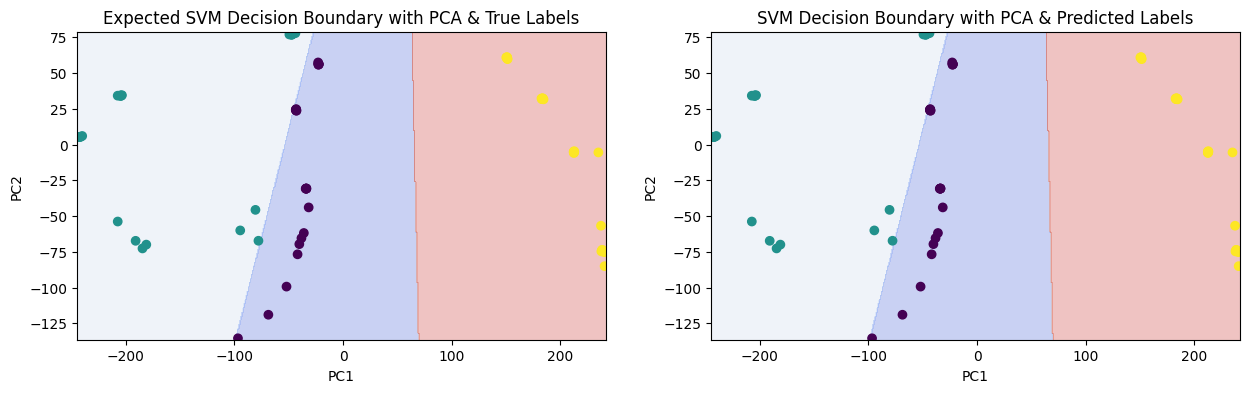

In [4]:
svc = SVC(kernel='linear')
svc.fit(pca_data[['PC1','PC2']], pca_data['Label'])

x_min, x_max = pca_data['PC1'].min() - 1, pca_data['PC1'].max() + 1
y_min, y_max = pca_data['PC2'].min() - 1, pca_data['PC2'].max() + 1
X, Y = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = svc.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)


# PLOTTING THE DECISION BOUNDARY 


fig, ax = plt.subplots(1, 2, figsize=(15, 4))


ax[0].contourf(X, Y, Z, alpha=0.3, cmap=plt.cm.coolwarm)
ax[0].scatter(pca_data['PC1'], pca_data['PC2'], c=pca_data['Label'], marker='o')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Expected SVM Decision Boundary with PCA & True Labels')

predicted_labels = svc.predict(pca_data[['PC1', 'PC2']])

ax[1].contourf(X, Y, Z, alpha=0.3, cmap=plt.cm.coolwarm)
ax[1].scatter(pca_data['PC1'], pca_data['PC2'], c=predicted_labels, marker='o')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('SVM Decision Boundary with PCA & Predicted Labels')

fig.savefig('docs/plots/svm/svm_on_raw.png')

plt.show()


### After adding additional 5% points

Noise Level: 0.05
Accuracy: 0.9866666666666667


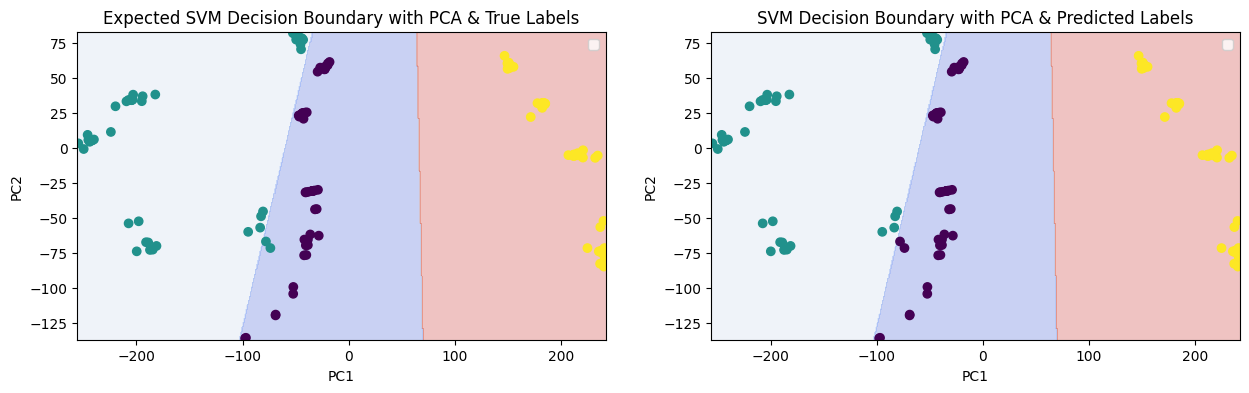

Noise Level: 0.1
Accuracy: 0.9666666666666667


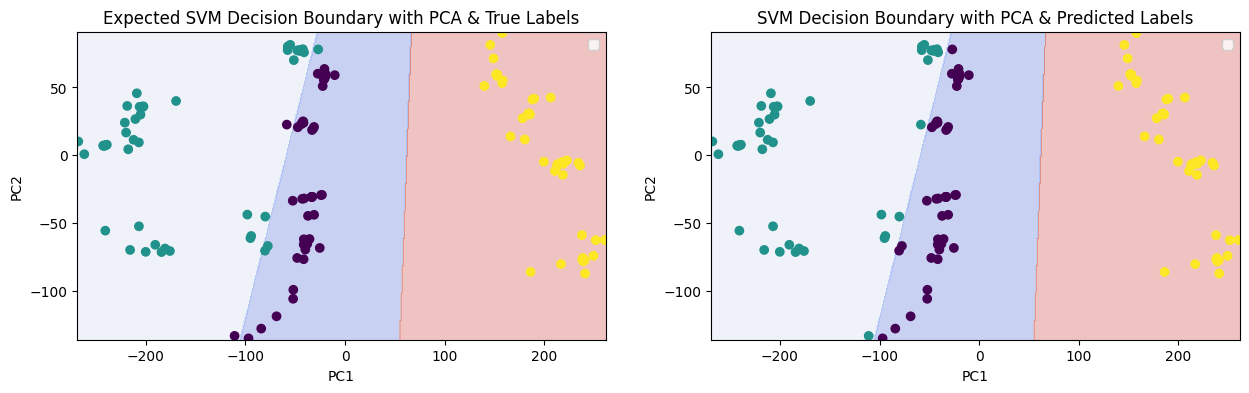

Noise Level: 0.15
Accuracy: 0.9666666666666667


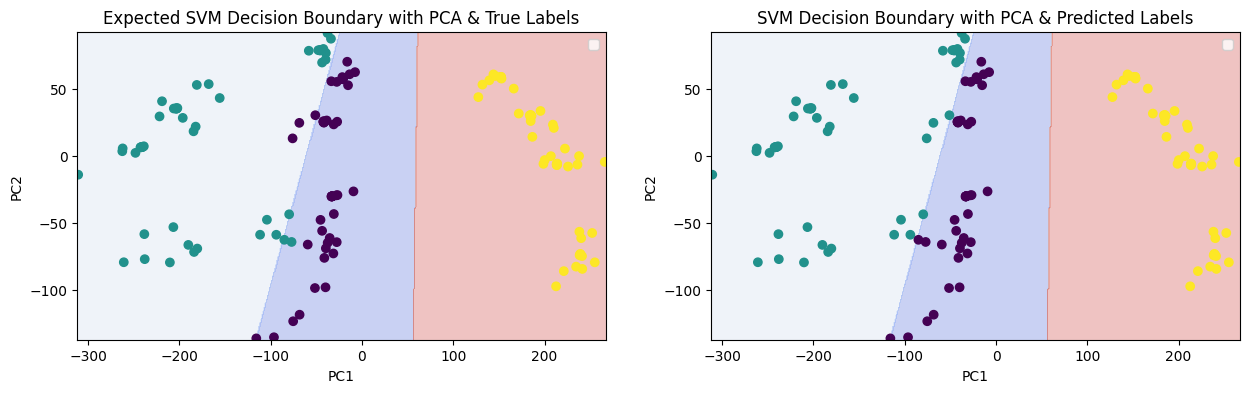

In [8]:
for p in [0.05, 0.10, 0.15]:

    data_noisy = data.copy()

    for i in range(3):
        data_noisy[['Sensor1', 'Sensor2', 'Sensor3']] = add_noise(data[['Sensor1', 'Sensor2', 'Sensor3']], p)
        data_augmented = pd.concat([data, data_noisy], axis=0).reset_index(drop=True)

    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(data_augmented[['Sensor1','Sensor2','Sensor3']])
    pca_data = pd.DataFrame(pca_data, columns=['PC1','PC2'])
    pca_data['Label'] = data_augmented['label']


    svc = SVC(kernel='linear')
    svc.fit(pca_data[['PC1','PC2']], pca_data['Label'])

    x_min, x_max = pca_data['PC1'].min() - 1, pca_data['PC1'].max() + 1
    y_min, y_max = pca_data['PC2'].min() - 1, pca_data['PC2'].max() + 1
    X, Y = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    Z = svc.predict(np.c_[X.ravel(), Y.ravel()])
    Z = Z.reshape(X.shape)


    # PLOTTING THE DECISION BOUNDARY 

    fig, ax = plt.subplots(1, 2, figsize=(15, 4))

    ax[0].contourf(X, Y, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax[0].scatter(pca_data['PC1'], pca_data['PC2'], c=pca_data['Label'], marker='o')
    ax[0].set_xlabel('PC1')
    ax[0].set_ylabel('PC2')
    ax[0].set_title('Expected SVM Decision Boundary with PCA & True Labels')
    ax[0].legend()

    predicted_labels = svc.predict(pca_data[['PC1', 'PC2']])

    ax[1].contourf(X, Y, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax[1].scatter(pca_data['PC1'], pca_data['PC2'], c=predicted_labels, marker='o')
    ax[1].set_xlabel('PC1')
    ax[1].set_ylabel('PC2')
    ax[1].set_title('SVM Decision Boundary with PCA & Predicted Labels')
    ax[1].legend()

    fig.savefig('docs/plots/svm/svm_on_raw.png')

    print(f'Noise Level: {p}')
    print(f'Accuracy: {np.mean(pca_data["Label"] == predicted_labels)}')
    plt.show()

# Trend with Number of Days and Dilutions per Day

In [16]:
sensor1 = pd.read_excel('data/time_data/no_of_days/Sensor 1_no of days_analyte 3.xlsx',names=['Unnamed: 0','dil1','dil2','dil3','dil4','dil5','dil6','dil7','dil8','dil9','dil10']).drop(['Unnamed: 0'], axis=1)
sensor2 = pd.read_excel('data/time_data/no_of_days/Sensor 2_no of days_analyte 3.xlsx',names=['Unnamed: 0','dil1','dil2','dil3','dil4','dil5','dil6','dil7','dil8','dil9','dil10']).drop(['Unnamed: 0'], axis=1)
sensor3 = pd.read_excel('data/time_data/no_of_days/Sensor 3_no of days_analyte 3.xlsx',names=['Unnamed: 0','dil1','dil2','dil3','dil4','dil5','dil6','dil7','dil8','dil9','dil10']).drop(['Unnamed: 0'], axis=1)

sensor1.head(2)

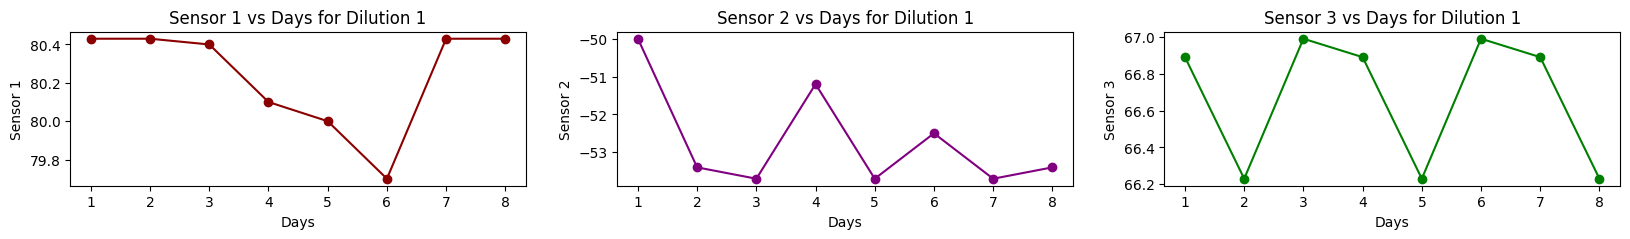

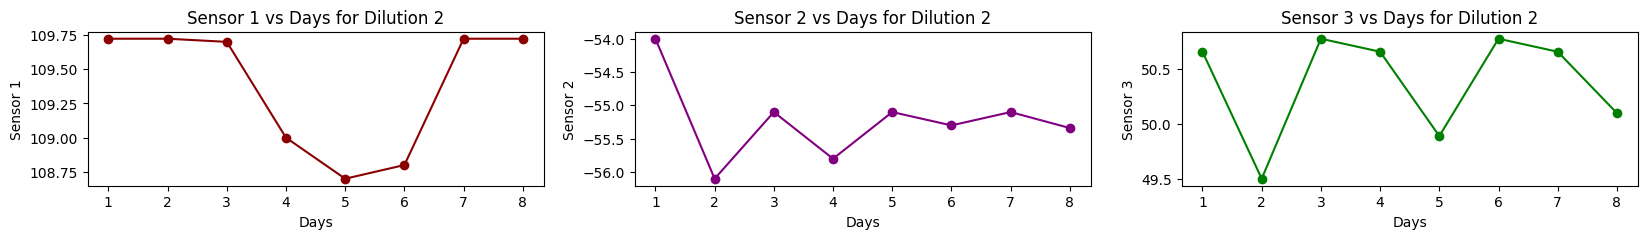

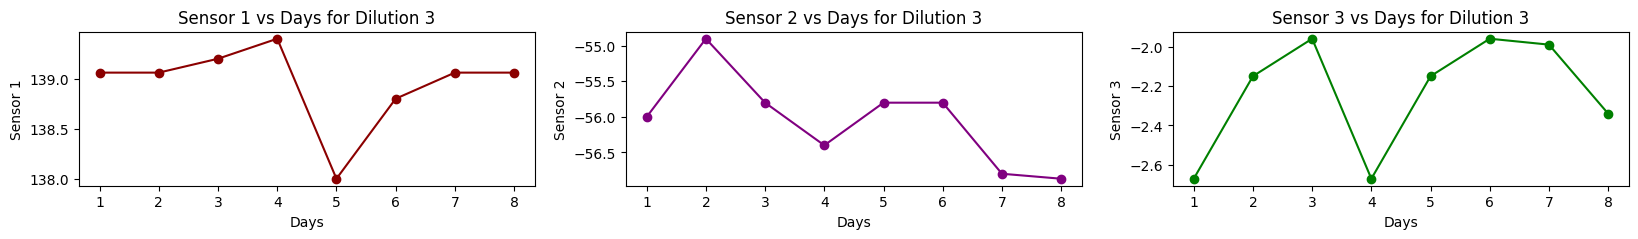

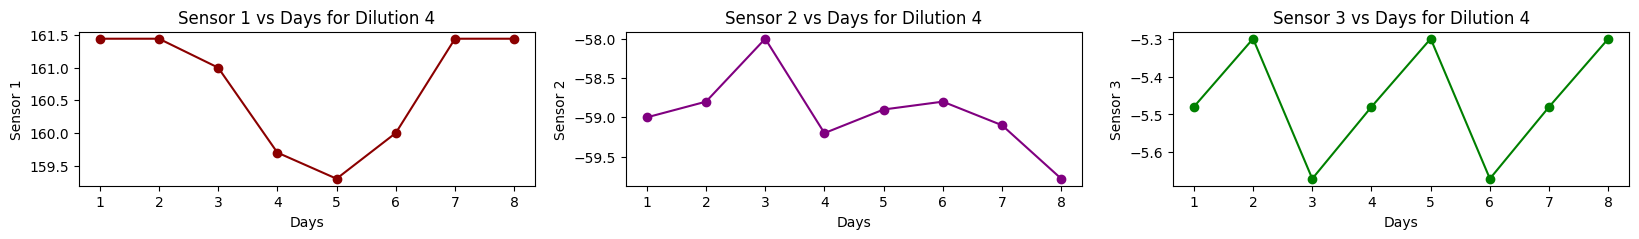

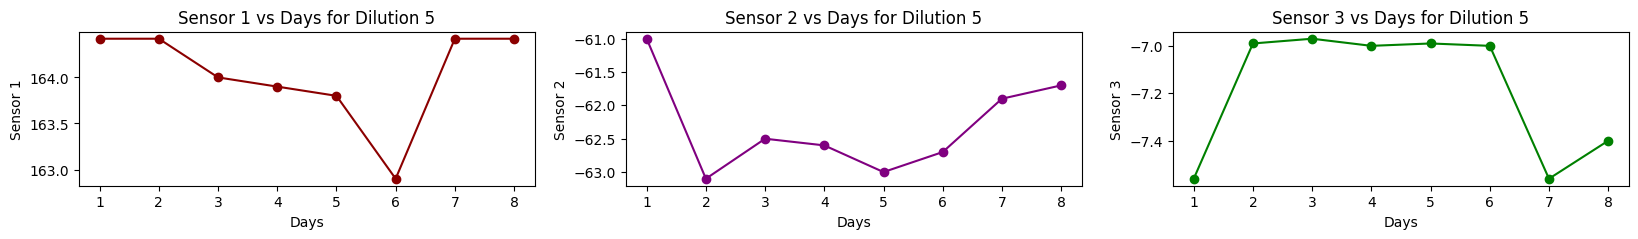

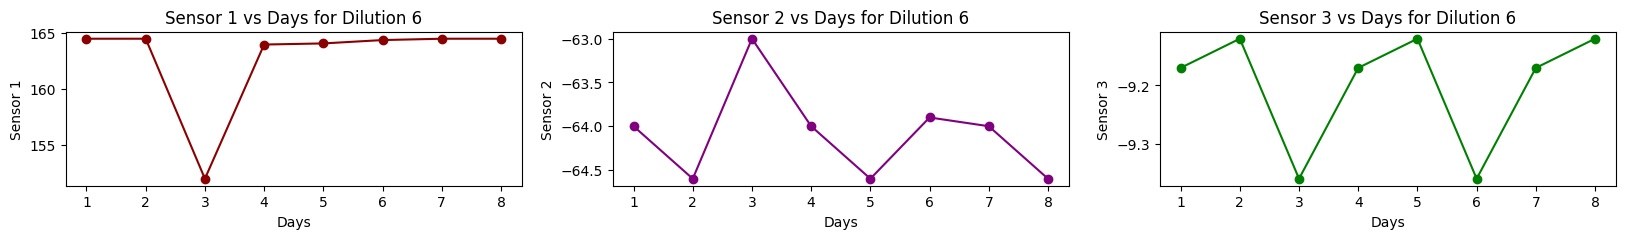

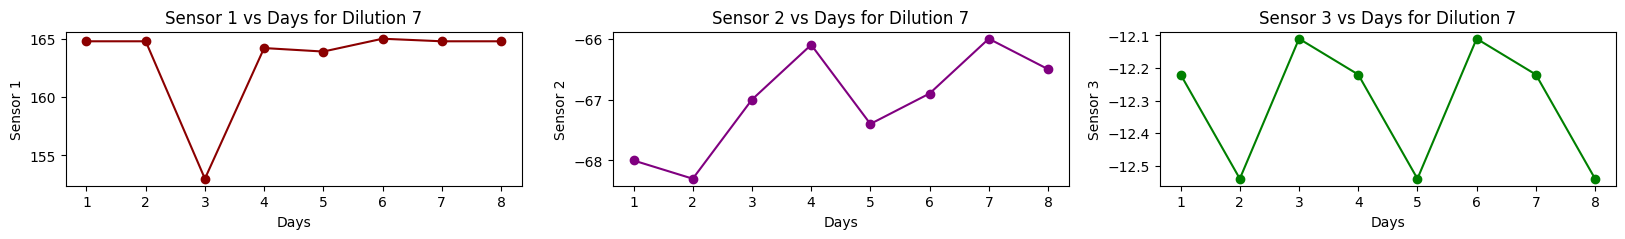

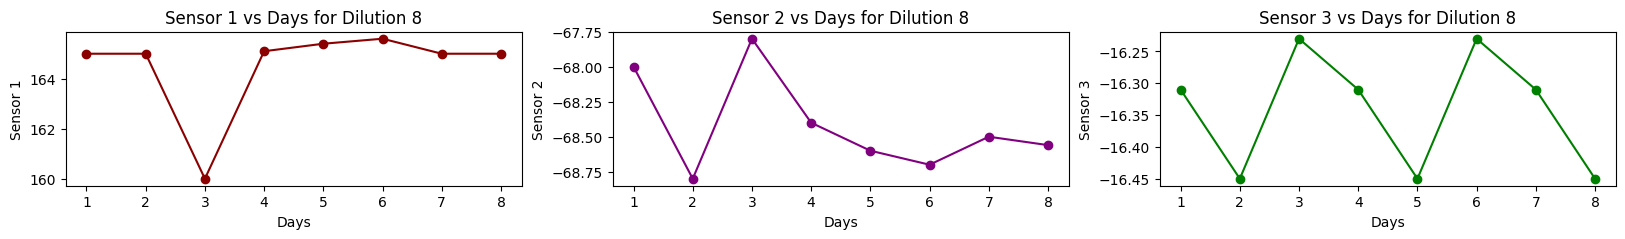

In [60]:
''' We need to combine the sensor readings of sensor1, 2, 3 for each dilution. '''

all_dilutions = []

for i in range(1, 9):
    dil = pd.DataFrame()
    dil['Days'] = [i for i in range(1, 9)]
    dil['Sensor1'] = sensor1[f'dil{i}']
    dil['Sensor2'] = sensor2[f'dil{i}']
    dil['Sensor3'] = sensor3[f'dil{i}']
    
    all_dilutions.append(dil)


''' Let us analyse how for a given dilution, the sensor readings change with days. '''

colors = ['darkred','purple','g']

for d in range(8):
    fig, ax = plt.subplots(1, 3, figsize=(20, 2))

    for i in range(3):
        ax[i].plot(all_dilutions[d]['Days'], all_dilutions[d][f'Sensor{i+1}'], marker='o',c=colors[i])
        ax[i].set_xlabel('Days')
        ax[i].set_ylabel(f'Sensor {i+1}')
        ax[i].set_title(f'Sensor {i+1} vs Days for Dilution {d+1}')

    fig.savefig('docs/plots/time_trends/sensor_readings.png')

    plt.show()

In [33]:
all_dilutions[0]

,Days,Sensor1,Sensor2,Sensor3
0,1,80.43,-50.0,66.89
1,2,80.43,-53.4,66.23
2,3,80.40,-53.7,66.99
3,4,80.10,-51.2,66.89
4,5,80.00,-53.7,66.23
5,6,79.70,-52.5,66.99
6,7,80.43,-53.7,66.89
7,8,80.43,-53.4,66.23


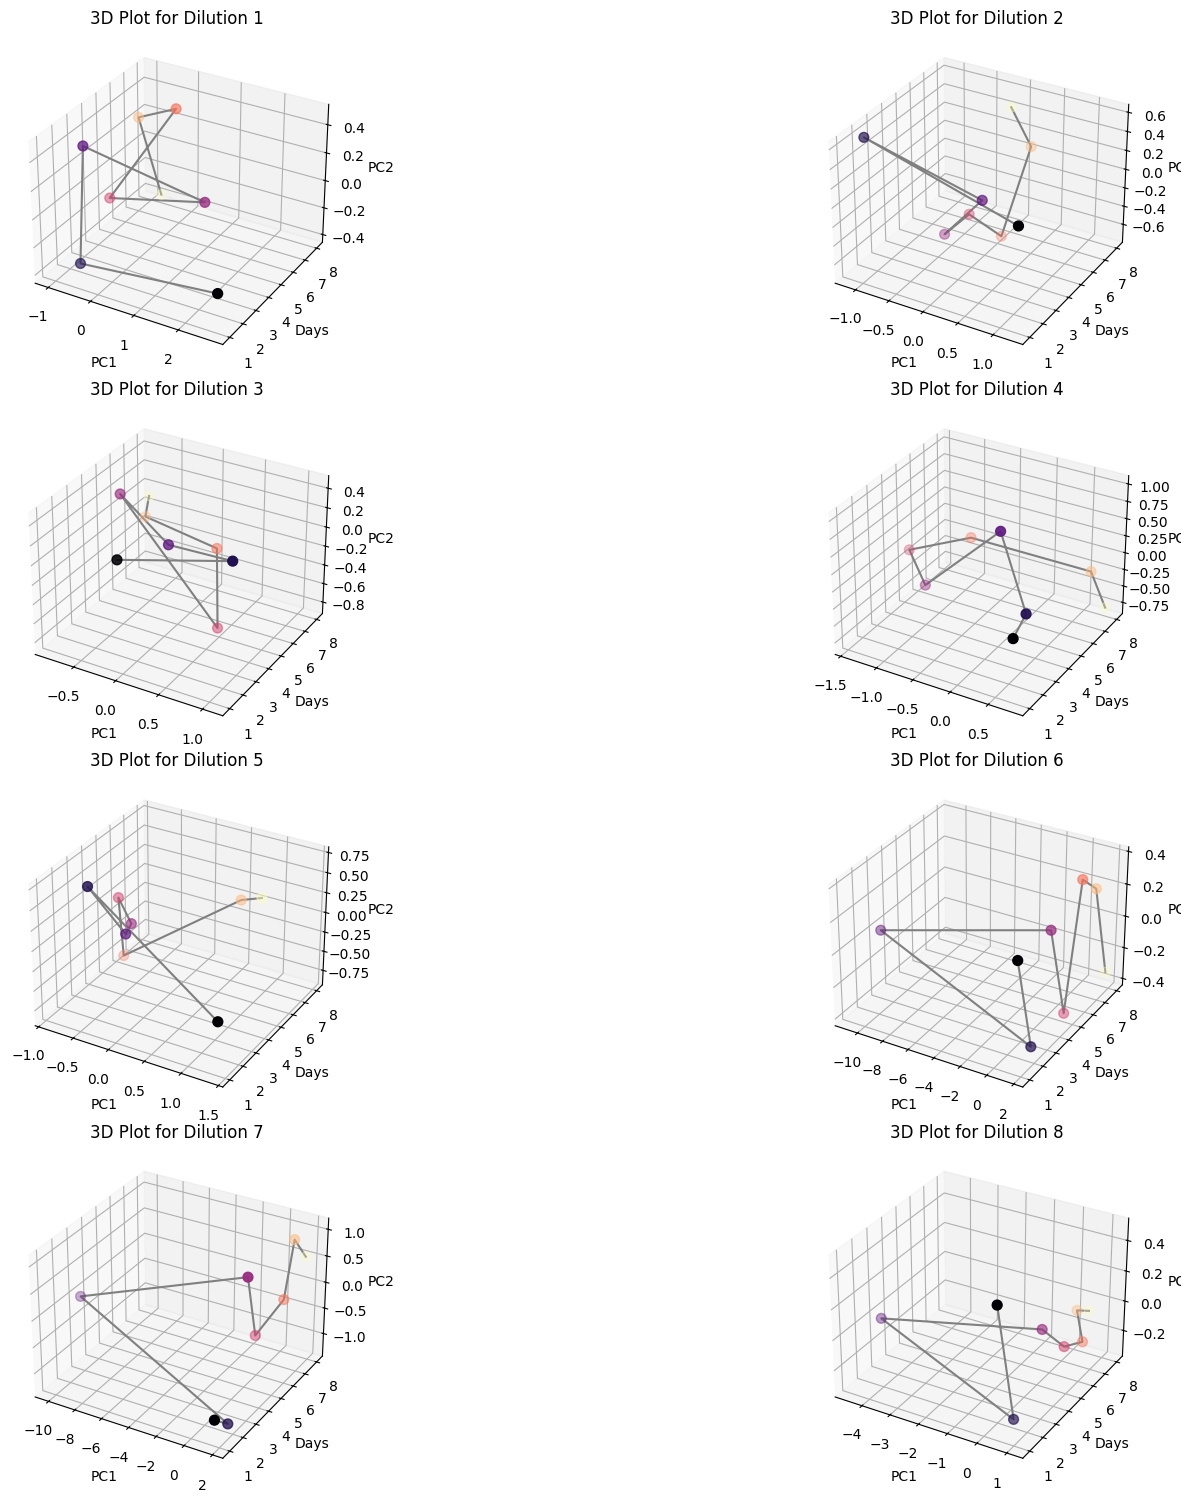

In [65]:
''' 3D plot for each dilution - using PCA(n=2) values of 3 sensors and plotting vs Days axis '''

fig = plt.figure(figsize=(30, 15))

for d in range(len(all_dilutions)):
    ax = fig.add_subplot(4, 2, d + 1, projection='3d')
    
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(all_dilutions[d][['Sensor1', 'Sensor2', 'Sensor3']])
    pca_data = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
    
    ax.scatter(pca_data['PC1'], all_dilutions[d]['Days'], pca_data['PC2'], c=all_dilutions[d]['Days'], cmap='magma', s=50)
    ax.plot(pca_data['PC1'], all_dilutions[d]['Days'], pca_data['PC2'], c='grey')
    ax.set_xlabel('PC1')
    ax.set_zlabel('PC2')
    ax.set_ylabel('Days')
    ax.set_title(f'3D Plot for Dilution {d + 1}')

plt.subplots_adjust(hspace=1, wspace=-0.5)
plt.tight_layout()
plt.savefig('docs/plots/time_trends/3d_plot_grid.png')
plt.show()